In [1]:
#**********************************L1_task1*****************************************************************************
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r'C:\sarvesh\codveda technologies\Data Set For Task\2) Stock Prices Data Set.csv')
df.head()

,symbol,date,open,high,low,close,volume
0,AAL,2014-01-02,25.0700,25.8200,25.0600,25.3600,8998943
1,AAPL,2014-01-02,79.3828,79.5756,78.8601,79.0185,58791957
2,AAP,2014-01-02,110.3600,111.8800,109.2900,109.7400,542711
3,ABBV,2014-01-02,52.1200,52.3300,51.5200,51.9800,4569061
4,ABC,2014-01-02,70.1100,70.2300,69.4800,69.8900,1148391


In [3]:
df.isna().sum()

symbol     0
date       0
open      11
high       8
low        8
close      0
volume     0
dtype: int64

In [4]:
df[['open', 'high', 'low']] = df[['open', 'high', 'low']].fillna(method='ffill')


In [5]:
df[['open', 'high', 'low']] = df[['open', 'high', 'low']].fillna(method='bfill')


In [6]:
print(df.isna().sum())

symbol    0
date      0
open      0
high      0
low       0
close     0
volume    0
dtype: int64


In [7]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
df['symbol'] = label_encoder.fit_transform(df['symbol'])

In [8]:
scaler = MinMaxScaler()
df[['open', 'high', 'low', 'close', 'volume']] = scaler.fit_transform(df[['open', 'high', 'low', 'close', 'volume']])

In [9]:
X = df.drop(columns=['close'])
Y = df['close']


In [10]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [11]:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("Y_train shape:", Y_train.shape)
print("Y_test shape:", Y_test.shape)


X_train shape: (373104, 6)
X_test shape: (124368, 6)
Y_train shape: (373104,)
Y_test shape: (124368,)


In [12]:
########## task 2#############
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [13]:
if 'date' in df.columns:
    df = df.drop(columns=['date'])


In [14]:
X = df[['open','high','low','volume','symbol']]
Y = df['close']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, random_state=0)


In [15]:
model = LinearRegression()
model.fit(X_train, Y_train)

LinearRegression()

In [16]:
coefficients = pd.DataFrame({'Feature': X.columns, 'Coefficient': model.coef_})
print(coefficients)


  Feature   Coefficient
0    open -4.964496e-01
1    high  7.679038e-01
2     low  7.320274e-01
3  volume -5.483785e-05
4  symbol -2.089867e-09


In [17]:
Y_pred = model.predict(X_test)


In [18]:
mse = mean_squared_error(Y_test, Y_pred)
r2 = r2_score(Y_test, Y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)


Mean Squared Error: 1.256657111856976e-07
R-squared: 0.9999487369038451


In [19]:
####### task 3########

from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [20]:
df['next_close'] = df.groupby('symbol')['close'].shift(-1)
df['next_return'] = (df['next_close'] - df['close']) / df['close']
df = df.dropna(subset=['next_close'])
df['target'] = (df['next_return'] > 0).astype(int)

In [21]:
features = ['open','high','low','close','volume']
df[features] = df[features].fillna(df[features].mean())

In [22]:
le = LabelEncoder()
df['symbol_enc'] = le.fit_transform(df['symbol'])
features.append('symbol_enc')

In [23]:
X = df[features]
y = df['target']

In [24]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X_scaled, y, test_size=0.25, random_state=42, stratify=y)


In [26]:
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

In [27]:
for k in [3, 5, 7]:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)

    print(f"\n🔹 Results for K = {k}")
    print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred, digits=4))



🔹 Results for K = 3
Accuracy: 0.5046
Confusion Matrix:
 [[28391 31323]
 [30225 34303]]
Classification Report:
               precision    recall  f1-score   support

           0     0.4844    0.4754    0.4799     59714
           1     0.5227    0.5316    0.5271     64528

    accuracy                         0.5046    124242
   macro avg     0.5035    0.5035    0.5035    124242
weighted avg     0.5043    0.5046    0.5044    124242


🔹 Results for K = 5
Accuracy: 0.5038
Confusion Matrix:
 [[28042 31672]
 [29974 34554]]
Classification Report:
               precision    recall  f1-score   support

           0     0.4833    0.4696    0.4764     59714
           1     0.5218    0.5355    0.5285     64528

    accuracy                         0.5038    124242
   macro avg     0.5026    0.5025    0.5025    124242
weighted avg     0.5033    0.5038    0.5035    124242


🔹 Results for K = 7
Accuracy: 0.5038
Confusion Matrix:
 [[27673 32041]
 [29611 34917]]
Classification Report:
           

In [28]:
####### task 1 level2 ##########
import math
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt

In [29]:
features = ['open','high','low','close','volume']
df[features] = df[features].fillna(df[features].mean())

le = LabelEncoder()
df['symbol_enc'] = le.fit_transform(df['symbol'])
features.append('symbol_enc')

X = df[features]
y = df['target']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=42, stratify=y)

In [30]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [31]:
coef_data = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_[0]
})
coef_data['Odds Ratio'] = coef_data['Coefficient'].apply(lambda x: math.exp(x))
print("\nModel Coefficients and Odds Ratios:")
print(coef_data)


Model Coefficients and Odds Ratios:
      Feature  Coefficient  Odds Ratio
0        open     1.778734    5.922355
1        high     0.007510    1.007538
2         low     0.068421    1.070816
3       close    -1.853164    0.156741
4      volume    -0.006924    0.993100
5  symbol_enc    -0.006074    0.993944


In [32]:
y_pred = model.predict(X_test)

print("\nEvaluation Metrics:")
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Evaluation Metrics:
Accuracy: 0.5191
Precision: 0.5194
Recall: 0.9911

Confusion Matrix:
 [[  534 59180]
 [  572 63956]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.01      0.02     59714
           1       0.52      0.99      0.68     64528

    accuracy                           0.52    124242
   macro avg       0.50      0.50      0.35    124242
weighted avg       0.50      0.52      0.36    124242



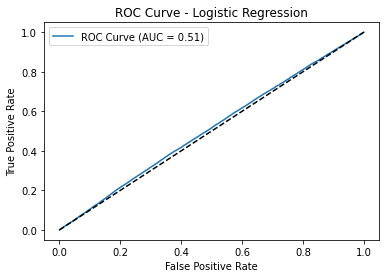

In [33]:
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC = {roc_auc:.2f})")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Logistic Regression")
plt.legend()
plt.show()

In [34]:
############# level2 task 2 ##########

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, export_text
from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix

In [35]:
X = df[['open', 'high', 'low', 'close', 'volume']]
y = df['target']

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42, stratify=y)

In [37]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [38]:
print("Decision Tree Rules (Top Levels):")
print(export_text(tree_clf, feature_names=list(X.columns), max_depth=3))

Decision Tree Rules (Top Levels):
|--- open <= 0.00
|   |--- low <= 0.00
|   |   |--- close <= 0.00
|   |   |   |--- class: 1
|   |   |--- close >  0.00
|   |   |   |--- volume <= 0.22
|   |   |   |   |--- truncated branch of depth 31
|   |   |   |--- volume >  0.22
|   |   |   |   |--- class: 1
|   |--- low >  0.00
|   |   |--- volume <= 0.04
|   |   |   |--- class: 0
|   |   |--- volume >  0.04
|   |   |   |--- open <= 0.00
|   |   |   |   |--- truncated branch of depth 8
|   |   |   |--- open >  0.00
|   |   |   |   |--- truncated branch of depth 6
|--- open >  0.00
|   |--- close <= 0.00
|   |   |--- volume <= 0.05
|   |   |   |--- low <= 0.00
|   |   |   |   |--- class: 1
|   |   |   |--- low >  0.00
|   |   |   |   |--- truncated branch of depth 5
|   |   |--- volume >  0.05
|   |   |   |--- close <= 0.00
|   |   |   |   |--- truncated branch of depth 4
|   |   |   |--- close >  0.00
|   |   |   |   |--- truncated branch of depth 4
|   |--- close >  0.00
|   |   |--- volume <= 0.

In [39]:
y_pred = tree_clf.predict(X_test)
print("\nAccuracy:", round(accuracy_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.5012
F1 Score: 0.5192

Confusion Matrix:
 [[28813 30901]
 [31068 33460]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.48      0.48     59714
           1       0.52      0.52      0.52     64528

    accuracy                           0.50    124242
   macro avg       0.50      0.50      0.50    124242
weighted avg       0.50      0.50      0.50    124242



In [40]:
pruned_tree = DecisionTreeClassifier(max_depth=3, random_state=42)
pruned_tree.fit(X_train, y_train)

print("\nPruned Decision Tree Rules:")
print(export_text(pruned_tree, feature_names=list(X.columns), max_depth=3))



Pruned Decision Tree Rules:
|--- open <= 0.00
|   |--- low <= 0.00
|   |   |--- close <= 0.00
|   |   |   |--- class: 1
|   |   |--- close >  0.00
|   |   |   |--- class: 0
|   |--- low >  0.00
|   |   |--- volume <= 0.04
|   |   |   |--- class: 0
|   |   |--- volume >  0.04
|   |   |   |--- class: 0
|--- open >  0.00
|   |--- close <= 0.00
|   |   |--- volume <= 0.05
|   |   |   |--- class: 1
|   |   |--- volume >  0.05
|   |   |   |--- class: 1
|   |--- close >  0.00
|   |   |--- volume <= 0.06
|   |   |   |--- class: 1
|   |   |--- volume >  0.06
|   |   |   |--- class: 0



In [41]:
y_pred_pruned = pruned_tree.predict(X_test)
print("\nPruned Tree Accuracy:", round(accuracy_score(y_test, y_pred_pruned), 4))
print("Pruned Tree F1 Score:", round(f1_score(y_test, y_pred_pruned), 4))


Pruned Tree Accuracy: 0.519
Pruned Tree F1 Score: 0.681


In [42]:
import os
os.environ["OMP_NUM_THREADS"] = "1"
os.environ["OPENBLAS_NUM_THREADS"] = "1"
os.environ["MKL_NUM_THREADS"] = "1"


In [43]:
############# Level 2 Task 3 - K-Means Clustering #############

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [44]:
X = df[['open', 'high', 'low', 'close', 'volume']]

In [45]:
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)

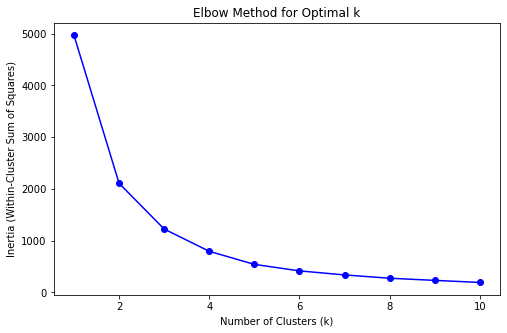

In [46]:
inertia_scores = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42, n_init=10)
    kmeans.fit(X_scaled)
    inertia_scores.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(K, inertia_scores, 'bo-')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia (Within-Cluster Sum of Squares)')
plt.title('Elbow Method for Optimal k')
plt.show()


In [47]:
#################### LEVEL3 TASK1 ###########################
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
import pandas as pd
import matplotlib.pyplot as plt

In [48]:
X_sample = X_train[:3000]
y_sample = y_train[:3000]

In [49]:
param_dist = {
    'n_estimators': [50, 100],      # fewer trees for speed
    'max_depth': [3, 5, None],      # only 3 options
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2]
}

rf = RandomForestClassifier(random_state=42)

In [50]:
random_search = RandomizedSearchCV(
    rf,
    param_distributions=param_dist,
    n_iter=3,              # only 3 random combinations
    cv=3,                  # 3-fold CV for speed
    scoring='f1',
    n_jobs=-1,
    random_state=42
)

random_search.fit(X_sample, y_sample)
best_rf = random_search.best_estimator_


In [51]:
y_pred = best_rf.predict(X_test)

print("Best Parameters:", random_search.best_params_)
print("Accuracy:", round(accuracy_score(y_test, y_pred), 4))
print("Precision:", round(precision_score(y_test, y_pred), 4))
print("Recall:", round(recall_score(y_test, y_pred), 4))
print("F1 Score:", round(f1_score(y_test, y_pred), 4))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))



Best Parameters: {'n_estimators': 50, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 3}
Accuracy: 0.5175
Precision: 0.5195
Recall: 0.9425
F1 Score: 0.6699

Confusion Matrix:
 [[ 3471 56243]
 [ 3708 60820]]

Classification Report:
               precision    recall  f1-score   support

           0       0.48      0.06      0.10     59714
           1       0.52      0.94      0.67     64528

    accuracy                           0.52    124242
   macro avg       0.50      0.50      0.39    124242
weighted avg       0.50      0.52      0.40    124242



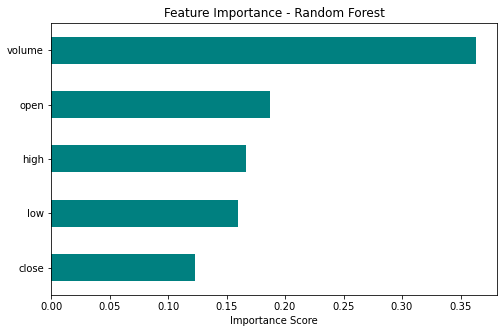

In [52]:
importances = pd.Series(best_rf.feature_importances_, index=X.columns)
plt.figure(figsize=(8, 5))
importances.sort_values().plot(kind='barh', color='teal')
plt.title("Feature Importance - Random Forest")
plt.xlabel("Importance Score")
plt.show()


In [53]:
#################LEVEL3 TASK2 #########################
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, classification_report, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

In [54]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [55]:
y_train = y_train.ravel()
y_test = y_test.ravel()

In [56]:
svm_linear = SVC(kernel='linear', probability=True, cache_size=500, random_state=42)
svm_linear.fit(X_train_scaled[:3000], y_train[:3000]) 

SVC(cache_size=500, kernel='linear', probability=True, random_state=42)

In [57]:
y_pred_linear = svm_linear.predict(X_test_scaled)
print("\n🔹 Results for Linear Kernel")
print("Accuracy:", round(accuracy_score(y_test, y_pred_linear), 4))
print("Precision:", round(precision_score(y_test, y_pred_linear), 4))
print("Recall:", round(recall_score(y_test, y_pred_linear), 4))
print("\nClassification Report:\n", classification_report(y_test, y_pred_linear))



🔹 Results for Linear Kernel
Accuracy: 0.5194
Precision: 0.5194
Recall: 1.0

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     59714
           1       0.52      1.00      0.68     64528

    accuracy                           0.52    124242
   macro avg       0.26      0.50      0.34    124242
weighted avg       0.27      0.52      0.36    124242



C:\Users\Mandar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mandar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Mandar\AppData\Roaming\Python\Python38\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result)

In [58]:
###################### LEVEL3 TASK 3 #######################################
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.utils import class_weight
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam

In [59]:
df = pd.read_csv(r"C:\sarvesh\codveda technologies\Data Set For Task\2) Stock Prices Data Set.csv")

In [60]:
df['return'] = df['close'].pct_change()
df['ma_5'] = df['close'].rolling(5).mean()
df['ma_10'] = df['close'].rolling(10).mean()
df['volatility'] = df['return'].rolling(10).std()




In [61]:
df['next_close'] = df['close'].shift(-1)
df['target'] = (df['next_close'] > df['close']).astype(int)


In [62]:
df.dropna(inplace=True)


In [63]:
X = df[['open','high','low','close','volume','return','ma_5','ma_10','volatility']]
y = df['target']

In [64]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [65]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

In [66]:
class_weights = class_weight.compute_class_weight(class_weight='balanced', classes=np.unique(y_train), y=y_train)
class_weights = dict(zip(np.unique(y_train), class_weights))


In [67]:
model = Sequential([
    Dense(256, activation='relu', input_shape=(X_train.shape[1],)),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

In [68]:
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [69]:
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=50,
    batch_size=64,
    class_weight=class_weights,
    callbacks=[early_stop],
    verbose=1
)

Epoch 1/50
6219/6219 [==============================] - 31s 5ms/step - loss: 0.4862 - accuracy: 0.7614 - val_loss: 0.4276 - val_accuracy: 0.7967
Epoch 2/50
6219/6219 [==============================] - 28s 5ms/step - loss: 0.4464 - accuracy: 0.7843 - val_loss: 0.3998 - val_accuracy: 0.8173
Epoch 3/50
6219/6219 [==============================] - 28s 5ms/step - loss: 0.4252 - accuracy: 0.7984 - val_loss: 0.3784 - val_accuracy: 0.8282
Epoch 4/50
6219/6219 [==============================] - 28s 5ms/step - loss: 0.4085 - accuracy: 0.8073 - val_loss: 0.3581 - val_accuracy: 0.8388
Epoch 5/50
6219/6219 [==============================] - 28s 4ms/step - loss: 0.3939 - accuracy: 0.8154 - val_loss: 0.3418 - val_accuracy: 0.8467
Epoch 6/50
6219/6219 [==============================] - 30s 5ms/step - loss: 0.3824 - accuracy: 0.8220 - val_loss: 0.3264 - val_accuracy: 0.8567
Epoch 7/50
6219/6219 [==============================] - 29s 5ms/step - loss: 0.3710 - accuracy: 0.8277 - val_loss: 0.3118 - val_ac

In [70]:
loss, acc = model.evaluate(X_val, y_val, verbose=0)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")
print(f"✅ Validation Loss: {loss:.4f}")


✅ Validation Accuracy: 93.45%
✅ Validation Loss: 0.1707


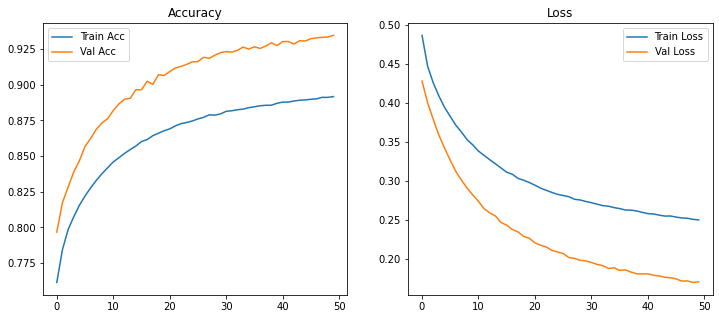

In [71]:
# Plot Training Curves
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend()
plt.title("Accuracy")

plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend()
plt.title("Loss")
plt.show()

3110/3110 [==============================] - 6s 2ms/step


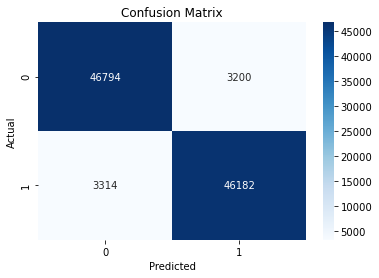


Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.94      0.93     49994
           1       0.94      0.93      0.93     49496

    accuracy                           0.93     99490
   macro avg       0.93      0.93      0.93     99490
weighted avg       0.93      0.93      0.93     99490



In [72]:
y_pred = (model.predict(X_val) > 0.5).astype(int)
cm = confusion_matrix(y_val, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("\nClassification Report:\n", classification_report(y_val, y_pred))

In [73]:
print(f" Final Model Accuracy: {acc*100:.2f}% | Loss: {loss:.4f}")


 Final Model Accuracy: 93.45% | Loss: 0.1707


In [74]:
model.save("stock_price_predictor_model.h5")


C:\Users\Mandar\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
